## generate coverage plots for each sequencing run

Include the negative controls to show negatives were clean. 

## import dependencies

In [187]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import os

```bash 

# index all bam files 

for file in $(ls ../data/bams/*.bam)
do 
    samtools index $file # index the bam files
done

# use tinycov to generate read coverage text files 

for file in $(ls ../data/bams/*.bam)
do 
    o="$(basename $file .bam)"
    /Users/katbraun/.local/bin/tinycov covplot --bins "../data/bams/bins_text.txt" --text "../data/bams/$o.txt" $file
done

```


In [289]:
%%bash

samtools index ../data/bams/run_643/643-neg-rep1.bam
samtools index ../data/bams/run_643/643-neg-rep2.bam

samtools index ../data/bams/run_644/644-neg-rep1.bam
samtools index ../data/bams/run_644/644-neg-rep2.bam

samtools index ../data/bams/run_645/645-neg-rep1.bam
samtools index ../data/bams/run_645/645-neg-rep2.bam

samtools index ../data/bams/run_671/671-neg.bam

In [295]:
%%bash

/Users/katbraun/.local/bin/tinycov covplot --bins "../data/bams/bins_text.txt" --text "../data/bams/run_643/negative_rep1.txt" "../data/bams/run_643/643-neg-rep1.bam"
/Users/katbraun/.local/bin/tinycov covplot --bins "../data/bams/bins_text.txt" --text "../data/bams/run_643/negative_rep2.txt" "../data/bams/run_643/643-neg-rep2.bam"

/Users/katbraun/.local/bin/tinycov covplot --bins "../data/bams/bins_text.txt" --text "../data/bams/run_644/negative_rep1.txt" "../data/bams/run_644/644-neg-rep1.bam"
/Users/katbraun/.local/bin/tinycov covplot --bins "../data/bams/bins_text.txt" --text "../data/bams/run_644/negative_rep2.txt" "../data/bams/run_644/644-neg-rep2.bam"

/Users/katbraun/.local/bin/tinycov covplot --bins "../data/bams/bins_text.txt" --text "../data/bams/run_645/negative_rep1.txt" "../data/bams/run_645/645-neg-rep1.bam"
/Users/katbraun/.local/bin/tinycov covplot --bins "../data/bams/bins_text.txt" --text "../data/bams/run_645/negative_rep2.txt" "../data/bams/run_645/645-neg-rep2.bam"

/Users/katbraun/.local/bin/tinycov covplot --bins "../data/bams/bins_text.txt" --text "../data/bams/run_671/negative.txt" "../data/bams/run_671/671-neg.bam"
##

Visualise read coverage in rolling windows from a bam file.
Figure(640x480)
Visualise read coverage in rolling windows from a bam file.
Figure(640x480)
Visualise read coverage in rolling windows from a bam file.
Figure(640x480)
Visualise read coverage in rolling windows from a bam file.
Figure(640x480)
Visualise read coverage in rolling windows from a bam file.
Figure(640x480)
Visualise read coverage in rolling windows from a bam file.
Figure(640x480)
Visualise read coverage in rolling windows from a bam file.
Figure(640x480)


chromosome: 100%|██████████| 1/1 [00:00<00:00,  5.62it/s]


In [296]:
def load_dataframes(path):
    filelist = [os.path.splitext(file)[0] for file in os.listdir(path) if file.endswith('.txt')]
    list_of_DFs = []
    for file in filelist: 
#         print(file)
        DF = path + '/' + file + '.txt'
        a = pd.read_csv(DF, header=None, sep='\t', low_memory=False)
        a.name = file
        list_of_DFs.append(a)
#     print(filelist)
    return(list_of_DFs)

In [297]:
a = load_dataframes('../data/bams/run_628/')
b = load_dataframes('../data/bams/run_643/')
c = load_dataframes('../data/bams/run_644/')
d = load_dataframes('../data/bams/run_645/')
e = load_dataframes('../data/bams/run_667/')
f = load_dataframes('../data/bams/run_671/')
g = load_dataframes('../data/bams/run_other/')

In [307]:

def plot_coverage(df_list, run_num):
    mpl.rcParams['axes.spines.left'] = True
    mpl.rcParams['axes.spines.right'] = False
    mpl.rcParams['axes.spines.top'] = False
    mpl.rcParams['axes.spines.bottom'] = True

    fig = plt.figure(figsize=(12,5))
    ax1=fig.add_subplot(111)
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=90)
    plt.ylim(1,50000)
            
    x = ('0-1000', '1000-2000', '2000-3000', '3000-4000', '4000-5000', '5000-6000', '6000-7000', '7000-8000', '8000-9000', '9000-10000', '10000-11000', '11000-12000', '12000-13000', '13000-14000', '14000-15000', '15000-16000', '16000-17000', '17000-18000', '18000-19000', '19000-20000', '20000-21000', '21000-22000', '22000-23000', '23000-24000', '24000-25000', '25000-26000', '26000-27000', '27000-28000', '28000-29000', '29000-30000')
    ax1.set_yscale('log')
    
    for df in df_list: 
        df_name = df.name
        df = df[3].tolist()

        ax1.plot(x,df, alpha=0.8, linestyle='--', label=df_name)

        ax1.legend(frameon=False, ncol=3, bbox_to_anchor=[1,1])

        ax1.set_xlabel('\n genome location', fontsize=12)
        ax1.set_ylabel('read depth (log) \n', fontsize=12)
        
        fig.tight_layout()

        fig.savefig('../figures/coverage_plots/coverage-plots-' + run_num + '.pdf', bbox_inches='tight', dpi=300)
    return()

#

()

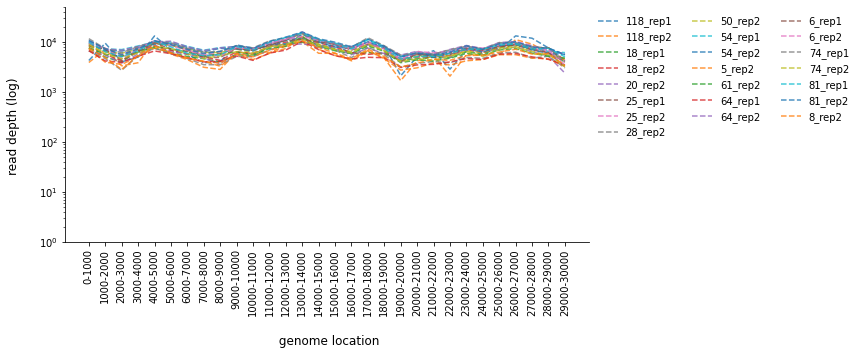

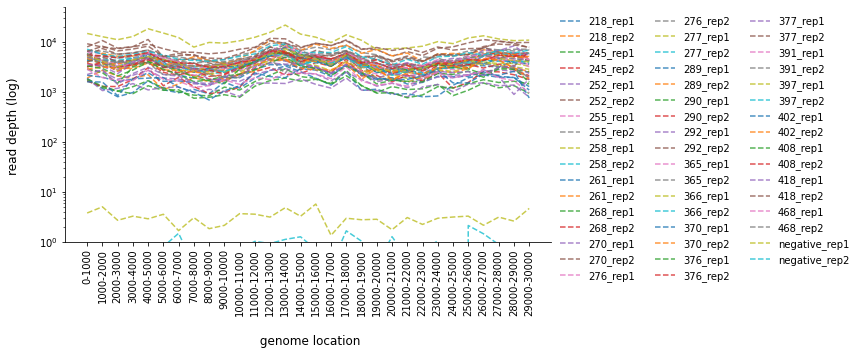

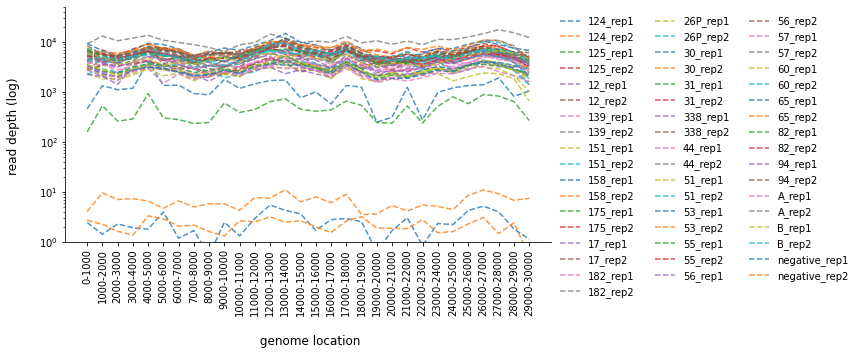

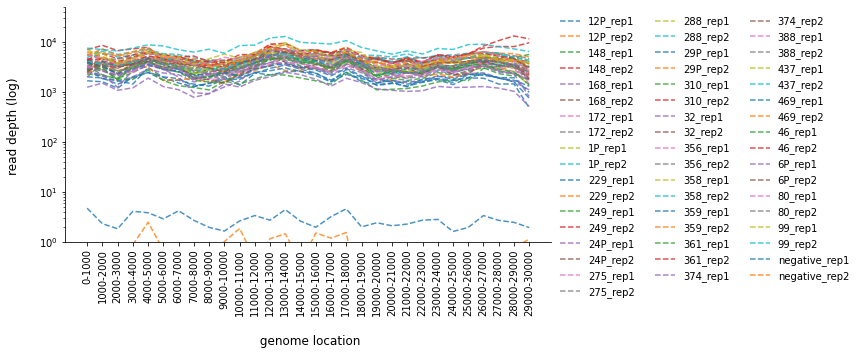

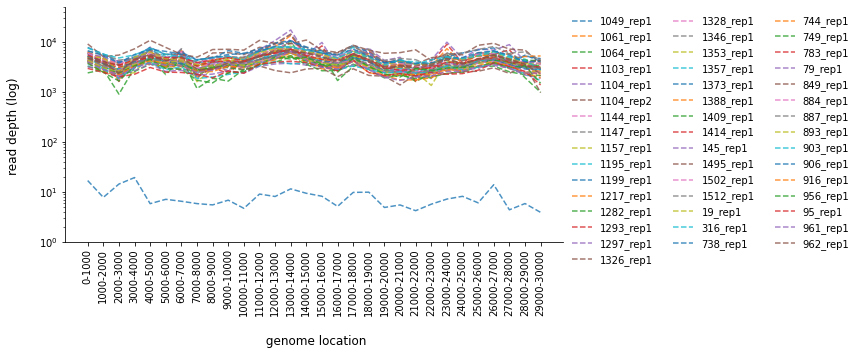

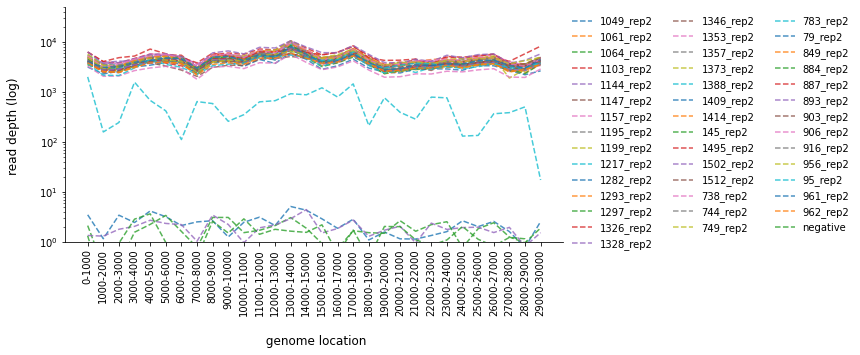

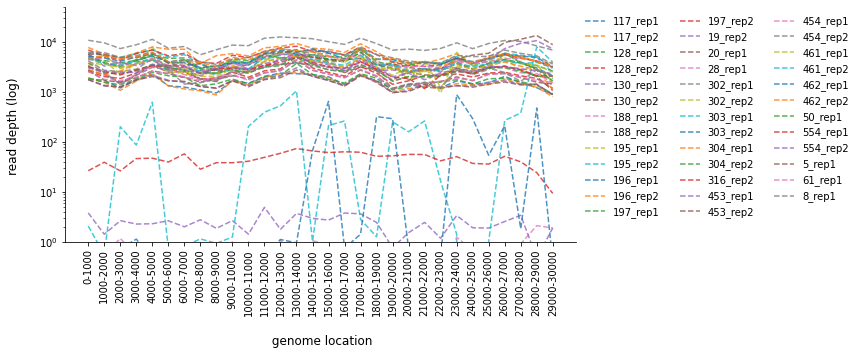

In [308]:
plot_coverage(a, '628')
plot_coverage(b, '643')
plot_coverage(c, '644')
plot_coverage(d, '645')
plot_coverage(e, '667')
plot_coverage(f, '671')
plot_coverage(g, 'other')